<a href="https://colab.research.google.com/github/kevinajordan/DS-Training/blob/master/02_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

It is necessary to perform data pre-processing for every data science or machine learning project. Different algorithms make different assumptions about your data and require different transformations.

You may have to make many different transformations and apply different algorithms to determine which representation and transformation works best at capturing the structure of your problem.

In general there are 3 different transformations that you will come across often and have to do for different datasets.


1.   Rescale
2.   Standardize
3.   Normalize


We will go over each with the sci-kit learn library and the Pima Indians Diabetes Dataset below.

You can read more about this dataset from here:

https://www.kaggle.com/uciml/pima-indians-diabetes-database

After covering these, we will cover how to handle missing data.


## **Helpful References:**

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

https://scikit-learn.org/stable/modules/preprocessing.html#normalization


# Exploratory Data Analysis

Understand the Pima Indians Diabetes Dataset

Get the following information at a minimum:
* Summary information of the dataset
* Descriptive statistics of your dataset
* Correlations between features of the data
* At least 2 plots of the data (i.e. histogram, scatterplot, barplot, etc.)

In [0]:
# Import software dependencies
import pandas as pd, numpy as np, scipy, seaborn as sns, matplotlib.pyplot as plt

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [0]:
col_names = ['Prego', 'Glucose','BP', 'SkinThick','Insulin',' BMI', 'DiabPedFunc','Age', 'Outcome']

In [0]:
# Read in the csv file.
data = pd.read_csv(url, names=col_names)

# Grab the first few lines of the dataset to get an initial look.
data.head(n=5)

,Prego,Glucose,BP,SkinThick,Insulin,BMI,DiabPedFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# get the summary information of your data with a pandas function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Prego          768 non-null int64
Glucose        768 non-null int64
BP             768 non-null int64
SkinThick      768 non-null int64
Insulin        768 non-null int64
 BMI           768 non-null float64
DiabPedFunc    768 non-null float64
Age            768 non-null int64
Outcome        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
# get the descriptive statistics of your data with a pandas function
data.describe()

,Prego,Glucose,BP,SkinThick,Insulin,BMI,DiabPedFunc,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


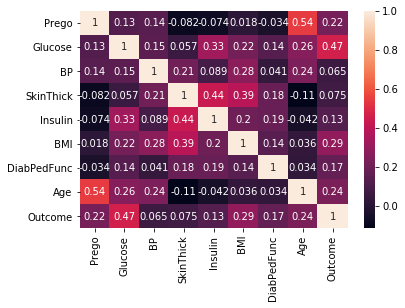

In [0]:
# Explore any correlations between the features of the data
corr = data.corr()
sns.heatmap(corr, annot=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


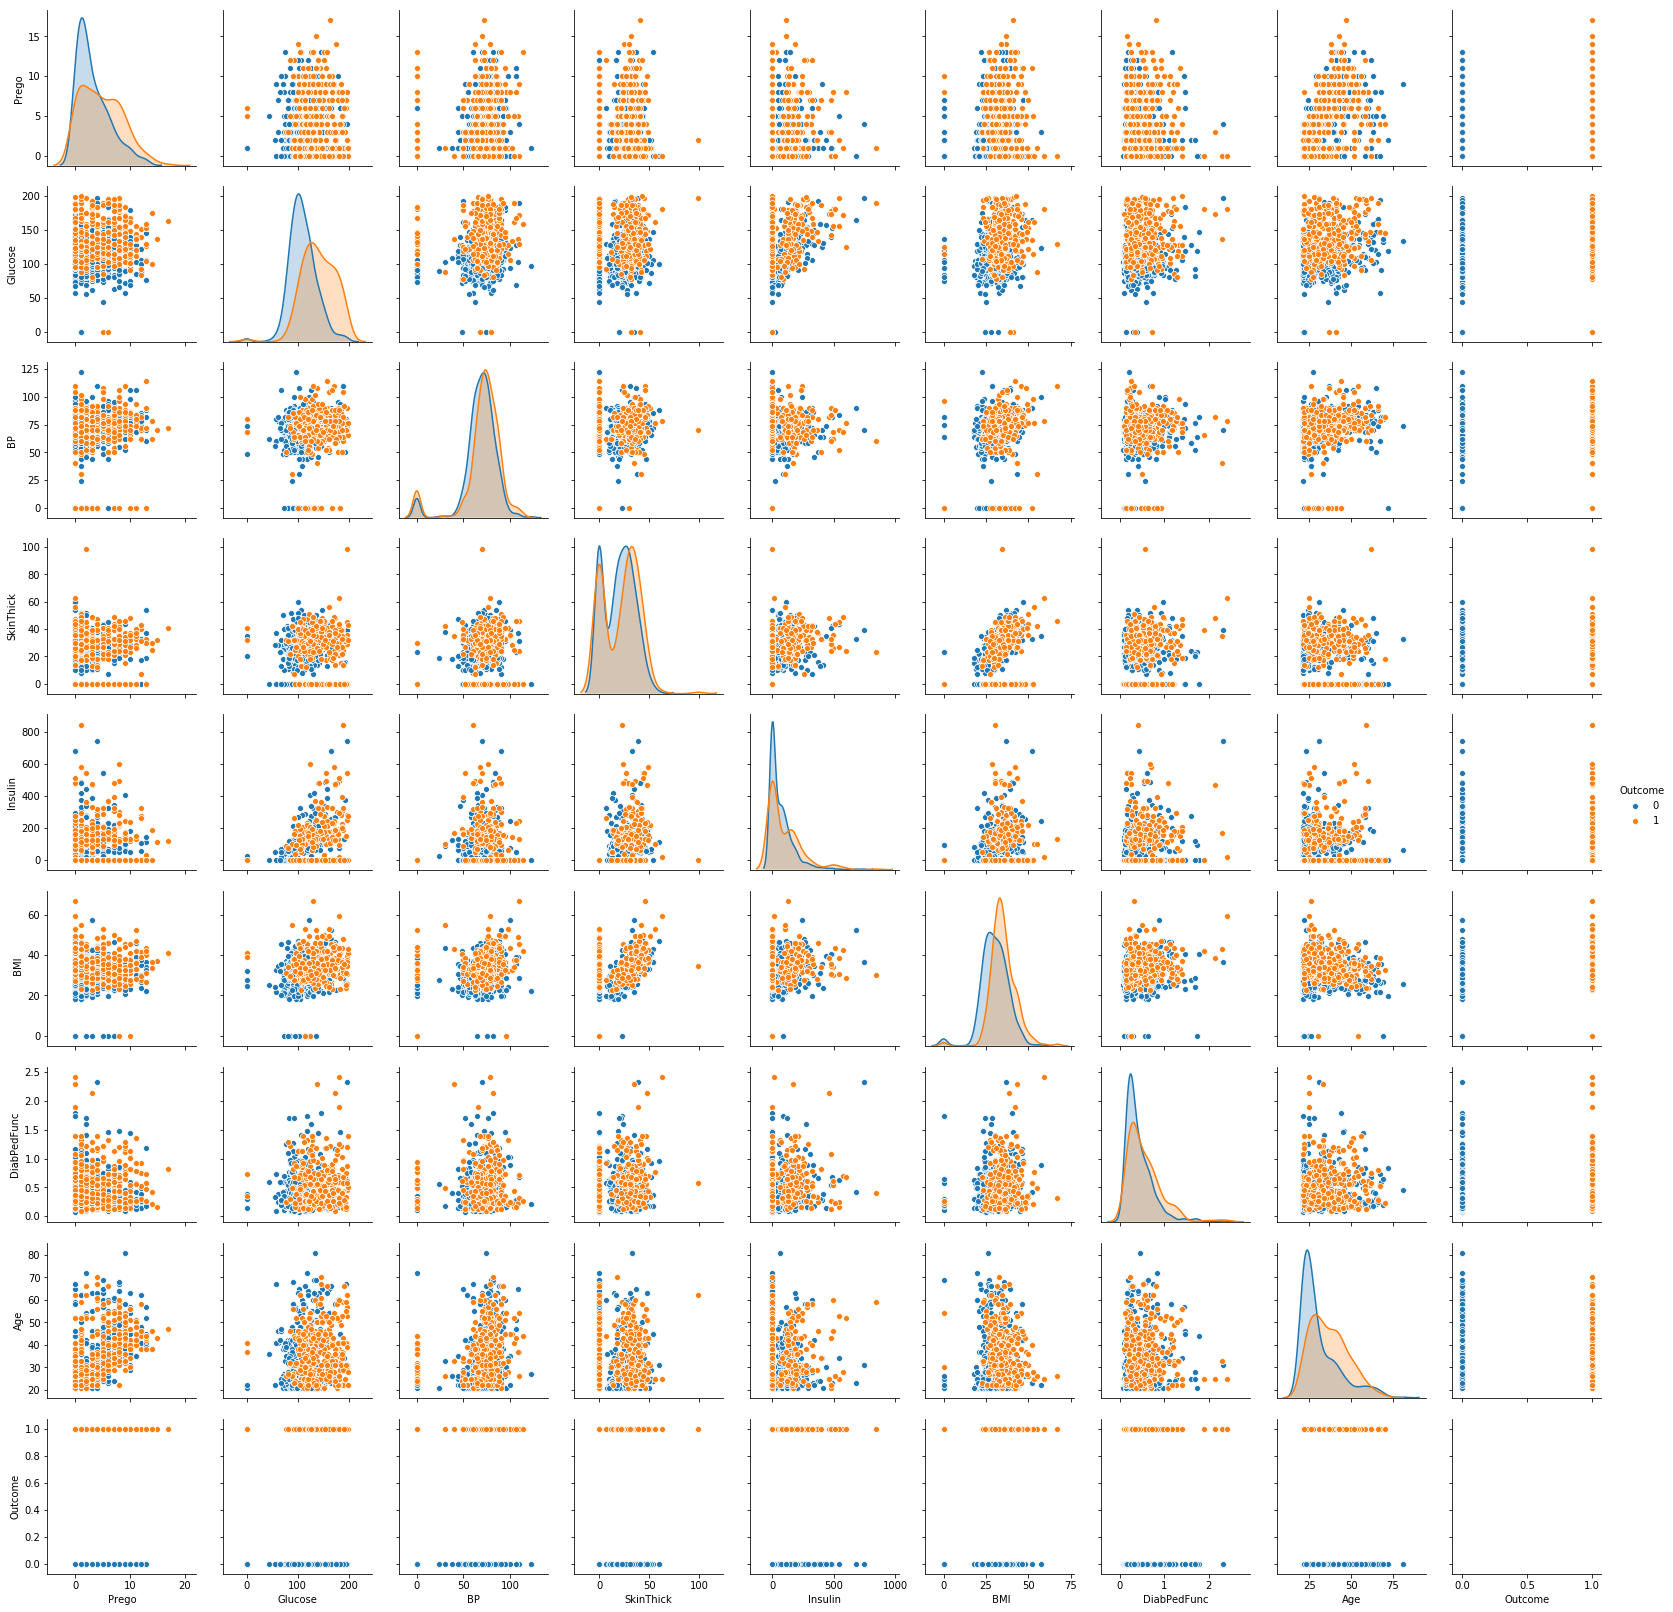

In [0]:
# Pairplot
# Blue dots-> Outcome=0 Orange dots-> Outcome=1
sns.pairplot(data, hue='Outcome')

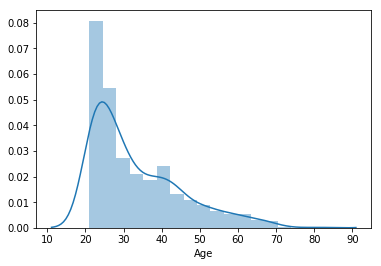

In [0]:
# Histogram of Age using distplot
sns.distplot(data['Age'], kde=True)

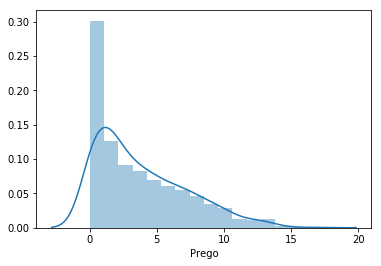

In [0]:
# Histogram of Pregnancies
sns.distplot(data['Prego'],kde=True)

# Rescaling

When your data has different features with different scales (min, max), it is beneficial to put them all on the same scale. This scale is often from 0 to 1.

Helpful Reference:
https://scikit-learn.org/stable/modules/preprocessing.html


In [0]:
# import software dependencies
# what sci-kit learn library performs rescaling of features to a specific range?
import pandas as pd, numpy as np, scipy
from sklearn.preprocessing import ________

In [0]:
# grab the pima indians diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"


In [0]:
# Read in the CSV file using pandas and take a quick look at the first few lines
df = ______

df._____(n=5)

Notice anything missing? Talk with the Instructor about the next step

In [0]:
# Read in the CSV file again with the appended data.
feature_names = _______

df = ________

In [0]:
# What pandas function returns the values for a dataset?
# store the values of the data frame in a variable named array
array = df._____

In [0]:
# separate array into input and output components
X = array[__, ___]
Y = array[___, ___]

In [0]:
# apply the sci-kit learn function that performs rescaling
scaler = ______(feature_range=(0, 1))


In [0]:
# What sci-kit learn function applies the scaled range to fit to the training data and transforms it?
rescaledX = scaler._____(X)

In [0]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

# Standardize

Standardization is a useful technique to transform attributes with a Gaussian (i.e. normal) distribution and differing means and standard deviations to a standard Gaussian distribution with a **mean of 0 and a standard deviation of 1**



Repeat the steps to read the data into a dataframe and create separate arrays for input and output

In [0]:
# What sci-kit learn function standardizes your data?
scaler = _______(X)

In [0]:
# fit the mean and std to your training data
rescaledX = scaler.____(X)

In [0]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

# Normalize

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures.

Repeat the steps to read the data into a dataframe and create separate arrays for input and output

In [0]:
# What sci-kit learn function normalizes the data?
scaler = _______().fit(X)
normalizedX = scaler.transform(X)

In [0]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

Take 10 min to read more about the importance of re-scaling here:
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

# Handling Missing Data

We will continue to use the Pima Indians Diabetes Dataset as there is missing data within it.

We will go over the following methods:


*   Removing rows with missing values
*   Imputing missing values

Lastly, we will cover Algorithms that can handle missing values.



In [0]:
# Read in the Pima Indians Diabetes dataset without the header
df = _____

In [0]:
# print out the summary statistics for the dataset? Do you notice any columns that have 0 as the min that shouldn't?
print(df.____)

In [0]:
# print out a summary of all the columns with zeros
print((df____ == 0).sum())

In Python, mark missing values as NaN in order for you to drop these rows later. 

In [0]:
# What pandas functions replaces the 0 with a numpy NaN?
df[[___]] = df[[_____]].____()

In [0]:
# What pandas functions drops rows with missing data or Na values?
df.____(inplace=True)

In [0]:
# What is the shape of our dataset now? Has it been reduced?
print(df.shape)

## Imputing Missing Values
Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

*  A constant value that has meaning within the domain, such as 0, distinct from all other values.
*  A value from another randomly selected record.
*  A mean, median or mode value for the column.
*  A value estimated by another predictive model.

Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.

For example, if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.

In [0]:
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)


In [0]:
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)


In [0]:
# count the number of NaN values in each column
print(dataset.isnull().sum())

Is there an impute function in the sci-kit learn library? Apply it to the dataset

In [0]:
df = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
df[[___]] = df[[_____]].____()
# split dataset into inputs and outputs
values = df.values
X = values[:,0:8]
y = values[:,8]
# fill missing values with mean column values
imputer = _______()
transformed_X = imputer.fit_transform(X)

Take 10 min to read this documentation.

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values